Сегодня мы будем выбирать случайного кандидата из списка, который мы выгрузили в тетрадке #0, проверять находится ли его профиль в открытом доступе и генерировать на основе полученной страницы пост.

## Выгружаем фото для поста

In [8]:
def load_candidates(name='candidates.txt'):
    with open(name) as f:
        return ['https://' + x.strip() for x in f.readlines()]

In [9]:
candidates = load_candidates()

In [10]:
len(candidates)

194

In [11]:
from selenium import webdriver

driver = webdriver.Chrome()#'path to chromedriver')

In [12]:
from bs4 import BeautifulSoup

def simple_close_profile(bs):
    return 'доступна только авторизованным' in str(bs)

Возьмем фото аватара из открытого профиля для создания поста.

In [13]:
from tqdm import tqdm_notebook
import time
import numpy as np

valid_candidates = []
images = []

for x in tqdm_notebook(candidates):
    wait_time = np.abs(np.random.gamma(1, scale=2) + np.random.normal()) + 2.3 * np.abs(np.random.normal(scale=4)) + 0.3
    print(wait_time)
    time.sleep(wait_time)
    
    
    driver.get(x)
    bs = BeautifulSoup(driver.page_source, 'html.parser')
    
    if not simple_close_profile(bs):
        valid_candidates.append(x)
        img_src = bs.findAll('img', attrs={'class': 'page_avatar_img'})[0].get('src')
        
        images.append(img_src)

16.315989867363825
6.6004235275270595
3.3697589496446203
3.2509521331219178
5.2385223113258705
20.077517626974316
11.181192619929902
12.980879529223664
9.442866483488952
11.705702752181868
9.85016709626455
5.544494109061078
18.527601860159233
25.37986592431334
3.1882094916507473
16.78573507745174
14.188359086473133
4.427515016962878
12.58296184456147
19.477590121114165
5.19823075970334
17.498653154293994
4.128984102313008
4.564977085534843
1.8448964458622128
4.705438545039866
11.871144246032543
10.217016024020577
15.365793993466513
8.594386232276781
9.652467311958908
1.3486793789902716
11.444758188886803
13.531925104340205
7.6238107170320975
8.976565048902815
14.25666982651958
10.9838512299538
7.026610545713491
11.281689852581236
7.37150373778537
14.923487108534767
12.977031198103163
1.5042886208107427
7.335859624648934
10.263229895943015
10.701224836374564
6.5034771501728414
11.603360941111369
8.519628615791063
12.121465340986767
16.450360252838557
13.374592010834665
9.469894433151282

В данном случае мы реализовали простой фильтр приватности страницы, не отделяя кандидаток, которые уже окончили вуз или не учились на факультете. Отделить действительно возможных кандидаток можно по открытым спискам зачисленных или по дате рождения в социальной сети.

Но в данном проекте мы не будем реализовывать подобный функционал. :)

In [25]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

Теперь выведем одно из <a href="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Wikipedia-logo-v2-ru.svg/1200px-Wikipedia-logo-v2-ru.svg.png">изображений</a>, которое мы выгрузили.

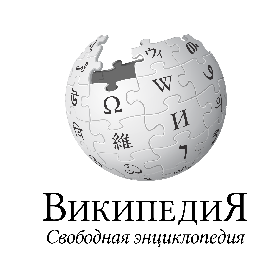

In [29]:
imshow(imread(images[0]))
plt.axis('off');

Хаха, шах и мат, нарушители спокойствия и создатели постов!))

Если честно, то это шутка, но тем не менее в данном случае имеет смысл пройтись не только по аватару, но и по другим общедоступным фотографиям, на которых находится человек(намек на то, что здесь стоит использовать классификаторы, к примеру сверточные нейросети), а лучше сам автор страницы.

In [57]:
driver.close()

## Выбор кандидатуры для поста

In [3]:
cands = zip(valid_candidates, images)

In [2]:
import numpy as np
def get_candidate(candidates):
    return np.random.choice(candidates)

In [5]:
image = get_candidate(cands)[1]

## Продолжаем генерировать пост!..

Теперь подгрузим нейросеть для генерации подписи к посту.

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [31]:
from keras.models import load_model
model = load_model('weights.hdf5')

In [74]:
from nltk import word_tokenize
def load_texts(name='augmented.txt'):
    with open(name) as f:
        return [word_tokenize(x.lower().strip()) for x in f.readlines()]

In [75]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(load_texts())

In [76]:
def generate_text(seed_text, next_words, max_sequence_len):
    for j in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen= 
                             max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
  
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [112]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def simple_postprocess(text):
    s = text[0].upper() + text[1:]
    string = word_tokenize(s)
    st = u''
    for i in range(len(string)):
        st += string[i]
        if str(morph.tag(string[i])[0]) == 'PNCT' or i != len(string) and str(morph.tag(string[i + 1])[0]) == 'PNCT':
            st += ''
        else:
            st += ' '
    return st

In [113]:
post_text = simple_postprocess(generate_text('самые прекрасные', 20, 54))

Самые прекрасные девушки учатся на матфаке!!!!!!!!!!!!!!!!


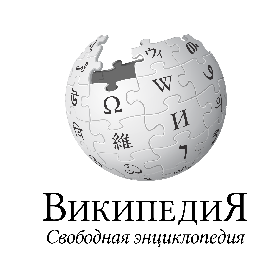

In [114]:
print(post_text)
imshow(imread(image))
plt.axis('off');